In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a=np.random.uniform(0,100,(5,5))

In [4]:
rand_b=np.random.uniform(0,100,(5,1))

In [5]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)


In [6]:
add_op=a+b

In [7]:
mul_op=a*b

In [13]:
with tf.Session() as sess:
    add_result=sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mul_result=sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


In [37]:
n_features=10
n_dense_neurons=3

In [38]:
X=tf.placeholder(tf.float32,(None,n_features))

In [39]:
W=tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b=tf.Variable(tf.ones([n_dense_neurons]))

In [40]:
xW=tf.matmul(X,W)
z=tf.add(xW,b)

In [41]:
a=tf.sigmoid(z)

In [42]:
init=tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    sess.run(init)
    layer_out=sess.run(a,feed_dict={X:np.random.random([1,n_features])})

In [45]:
print(layer_out)

[[ 0.9146747   0.58355671  0.00902312]]


# Simple Regression Example

In [47]:
x_data=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [48]:
y_label=np.linspace(0,10,10)+np.random.uniform(-1.5,-1.5,10)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

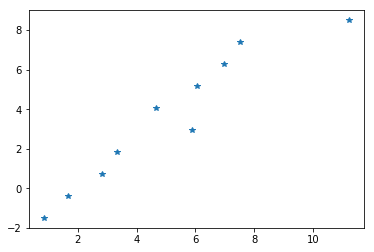

In [51]:
plt.plot(x_data,y_label,'*')

y=mx+b

In [53]:
np.random.rand(2)

array([ 0.69456466,  0.34245677])

In [55]:
m=tf.Variable(0.69)
b=tf.Variable(0.34)

In [56]:
error=0
for x,y in zip(x_data,y_label):
    y_hat=m*x + b
    error += (y-y_hat)**2

In [58]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [59]:
init=tf.global_variables_initializer()

In [77]:
with tf.Session() as sess:
    sess.run(init)
    trainig_steps=10000
    for i in range (trainig_steps):
        sess.run(train)
        
    final_slope,final_intercept=sess.run([m,b])
        

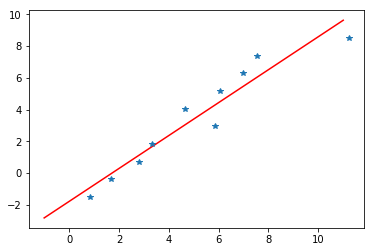

In [78]:
x_test=np.linspace(-1,11,10)
y_pred_plot=final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')